# ::: Medical Cost Insurance :::

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

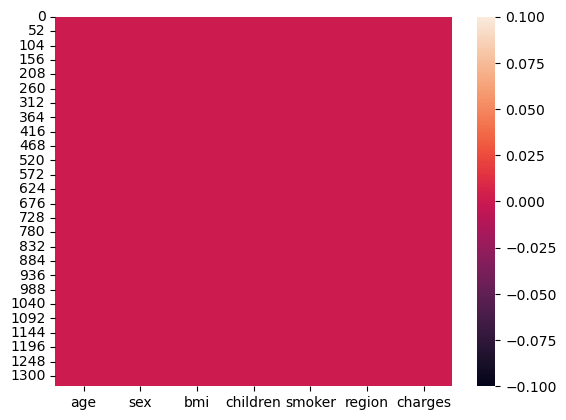

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


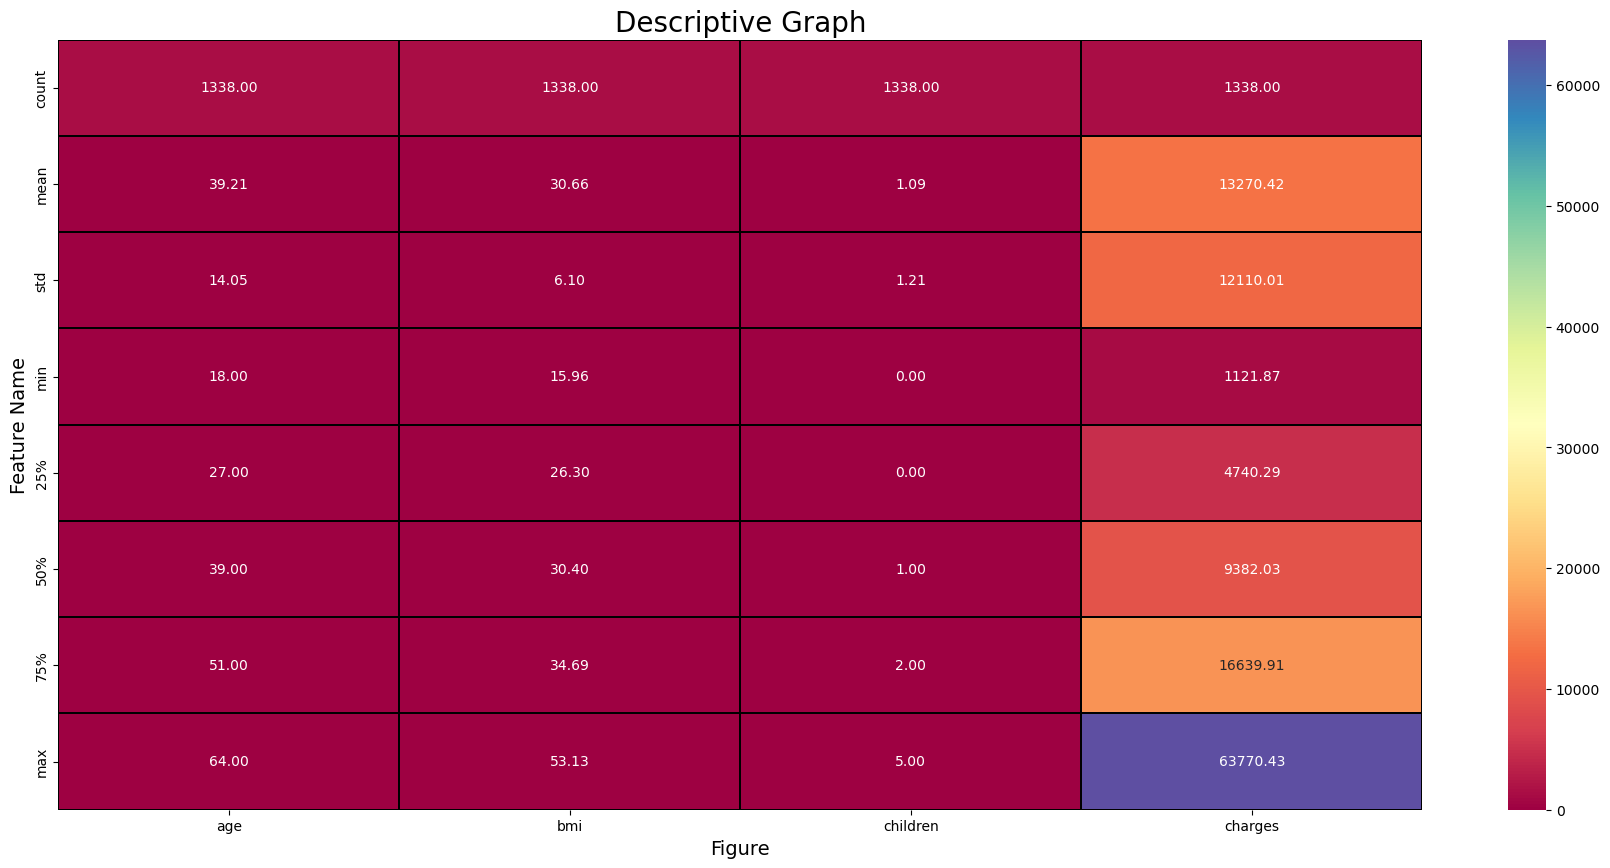

In [10]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [12]:
label_encoder = LabelEncoder()

In [13]:
df['sex'] = label_encoder.fit_transform(df['sex'])

In [15]:
df['region'] = label_encoder.fit_transform(df['region'])

In [17]:
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [20]:
linear_regression=LinearRegression()

In [23]:
linear_regression

LinearRegression()

In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = linear_regression.predict(x_test)

In [43]:
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [44]:
mse = mean_squared_error(y_test,y_pred)

In [45]:
mse

33635210.431178406

In [47]:
y_predict = linear_regression.predict(x)

In [48]:
df['predicted_charges'] = y_predict

In [49]:
df

,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,19,0,27.900,0,1,3,16884.92400,25139.731339
1,18,1,33.770,1,0,2,1725.55230,3883.478596
2,28,1,33.000,3,0,2,4449.46200,7045.672397
3,33,1,22.705,0,0,1,21984.47061,3870.093163
4,32,1,28.880,0,0,1,3866.85520,5686.487607
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,12290.558036
1334,18,0,31.920,0,0,0,2205.98080,3398.551371
1335,18,0,36.850,0,0,2,1629.83350,4511.385589
1336,21,0,25.800,0,0,3,2007.94500,1300.884639


Pridicted insurance cost be :

In [50]:
df['predicted_charges']

0       25139.731339
1        3883.478596
2        7045.672397
3        3870.093163
4        5686.487607
            ...     
1333    12290.558036
1334     3398.551371
1335     4511.385589
1336     1300.884639
1337    36871.527288
Name: predicted_charges, Length: 1338, dtype: float64